In [13]:
import glob
import random
import base64
import pandas as pd
import cv2
from io import BytesIO
from IPython.display import HTML
import os
import numpy as np
from PIL import Image

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


numpy.ndarray

In [2]:
def datafram(path):
    image = pd.DataFrame()
    arr =[]
    arr = glob.glob(path + '\*')
    i = 0
    for b in arr:
        img = cv2.imread(b, cv2.IMREAD_UNCHANGED)
        image.loc[i, 'name'] = b.split('C:\\Users\\shinn\\Desktop\\HW\\Python\\Lab3\\images2\\')[1]
        a = ''
        if img.shape[2] == 3:
            a = 'RGB'
        else:
            a = 'RGBA'
        image.loc[i, 'color model'] = a
        image.loc[i, 'format'] = b.split('.')[1]
        image.loc[i, 'chanel'] = img.shape[2]
        image.loc[i, 'size'] = round(os.stat(b).st_size / 1024, 2)
        image.loc[i, 'width'] = img.shape[1]
        image.loc[i, 'height'] = img.shape[0]
        image.loc[i, 'fullpath'] = b
        i = i + 1
    image["image"] = image.fullpath.map(lambda f: get_thumbnail(f))
    return image   

C:\Users\shinn\AppData\Local\Temp\ipykernel_9768\481198913.py:14: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  i.thumbnail((150, 150), Image.LANCZOS)


,name,color model,format,chanel,size,width,height,fullpath,image
0,1.png,RGBA,png,4.0,715.38,967.0,601.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\1.png,
1,2.jpeg,RGB,jpeg,3.0,53.60,718.0,750.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\2.jpeg,
2,2.PNG,RGBA,PNG,4.0,483.61,716.0,450.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\2.PNG,
3,3.jpg,RGB,jpg,3.0,66.55,730.0,411.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\3.jpg,
4,4.jpg,RGB,jpg,3.0,31.57,700.0,394.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\4.jpg,
5,5.jpg,RGB,jpg,3.0,37.81,700.0,394.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\5.jpg,
6,6.jpg,RGB,jpg,3.0,72.45,800.0,533.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\6.jpg,
7,8.PNG,RGBA,PNG,4.0,575.36,960.0,463.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\8.PNG,
8,9.PNG,RGBA,PNG,4.0,219.03,578.0,372.0,C:\Users\shinn\Desktop\HW\Python\Lab3\images2\9.PNG,

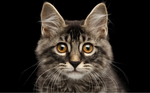
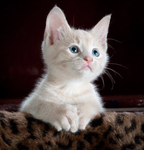
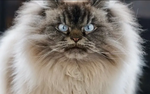
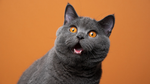
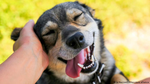
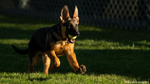
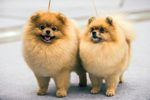
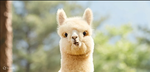
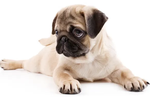

In [3]:
ima = datafram(r"C:\Users\shinn\Desktop\HW\Python\Lab3\images2")
HTML(ima.to_html(formatters={'image': image_formatter}, escape=False))


In [4]:
import cv2
import numpy as np
import random

def func_resize(file):
    img = cv2.imread(file)
    img = cv2.resize(img, (500, 500))
    return img

def func_poster(path, file, amount_columns, amount_rows):
    images = glob.glob(path + '\*')
    width = amount_columns * 500
    height = amount_rows * 500
    channels = 3
    new_img = np.zeros((height,width,channels), dtype=np.uint8)
    x_offset=y_offset=0
    rgb = [0, 1, 2]
    arr_img = []
    for im in images:
        arr_img.append(func_resize(im))
    i = 1
    arr_img2 = []
    max_img = amount_columns * amount_rows
    arr_img = random.sample(arr_img, max_img)
    for imag in arr_img:
        samp_list = []
        for ran in rgb:
            a = random.sample(rgb, 1)
            samp_list.append(a[0])
        arr_img2.append(imag[:,:,[samp_list[0],samp_list[1],samp_list[2]]])
        i += 1
    i_row = 0
    i = 0
    while (i_row < amount_rows):
        j_col = 0
        x_offset = 0
        while (j_col < amount_columns):
            new_img[y_offset:y_offset+arr_img2[i].shape[0], x_offset:x_offset+arr_img2[i].shape[1]] = arr_img2[i]
            i += 1
            x_offset += 500
            j_col += 1
        i_row += 1
        y_offset += 500
    cv2.imwrite(file, new_img)
    return new_img

In [5]:
img = func_poster(r"C:\Users\shinn\Desktop\HW\Python\Lab3\images2", "poster1.png", 3, 3)
cv2.imwrite('poster1.png', img)

True